In [1]:
import matplotlib.pyplot as plt
import time 
import random
import math
import heapq
import numpy as np
import pandas as pd


In [2]:
# implementation of an undirected graph using Adjacency Matrix, with weighted or unweighted edges
# its definitely work


# class Weighted_Graph_matrix:
    
#     V=0
#     edges = [] #its a 2d array
    
#     def __init__(self,num):
#         self.V=num
#         self.edges=[[0 for column in range(self.V)]
#                       for row in range(self.V)]
        

#     def add_edge_matrix(self, u, v, weight=1):
#         if u < self.V and v < self.V:
#             self.edges[u][v] = weight
#             self.edges[v][u] = weight
#             return True
#         else:
#             return False

#     def print_graph(self):
#         for row in self.edges:
#             print(row)
            
#     def dijkstra_matrix(self, src):
        
#         #create the 3 utility arrays used during dijkstra search
#         distanceToSource=[float('inf')]*self.V #this is the shortest time we found SO FAR
        
#         #parent array is actually not used at all if we are not trying to restruct shortest paths to every node
#         parent=[None] * self.V
        
#         visited=[False]*self.V
        
#         #create priority queue empty
#         #array implementation of priorityQ
# #         priorityArray_dist= []
# #         priorityArray_node= []
#         priorityArray=[]
        
#         #THIS IS THE ONLY 2 INIT WE NEED TO DO
#         distanceToSource[src] = 0
#         priorityArray.append((distanceToSource[src],src))
#         for i in range(self.V):
#             for y in range(self.V):
                
# #         priorityArray.sort(key= lambda x:x[0])
# #         priorityArray_dist=np.append(priorityArray_dist,distanceToSource[src])
# #         priorityArray_node=np.append(priorityArray_node,src)

                
# #         print(priorityArray)
#         #priorityArray == True this statement for checking if an array is empty DOESNT WORK
#         while (priorityArray): #ie not empty
# #             print(priorityArray)
#             smallest_distance, node = min(priorityArray, key=lambda x: x[0])
#             priorityArray.remove((smallest_distance, node))
# #             smallest_distance,node = priorityArray.pop(0)
# #             print(node)
#             if visited[node] == True:
#                 continue
#             else:
#                 visited[node] = True
                
#                 for i in range(self.V):
                    
#                     if self.edges[node][i] == 0: #means theres no edge
#                         continue 

#                     newcost = distanceToSource[node] + self.edges[node][i]
#                     if visited[i] == False and newcost < distanceToSource[i]:
#                         distanceToSource[i] = newcost
#                         parent[i]= node
#                         priorityArray.append((distanceToSource[i],i))
# #                         priorityArray.sort(key= lambda x:x[0])
                    
#         return distanceToSource
class Weighted_Graph_matrix:
    V = 0
    edges = []

    def __init__(self, num):
        self.V = num
        self.edges = [[0 for column in range(self.V)] for row in range(self.V)]

    def add_edge_matrix(self, u, v, weight=1):
        if u < self.V and v < self.V:
            self.edges[u][v] = weight
            return True
        else:
            return False

    def print_graph(self):
        for row in self.edges:
            print(row)

    def extractCheapest(self, pq):
        min = float('inf')
        u = 0

        # print("PQ" , pq) 

        # Find the minimum in the priority queue O(|V|))
        for i in range(self.V):
            if pq[i] < min:
                min = pq[i]
                u = i

        # Remove the minimum from the priority queue because it is now in the set S
        pq[u] = float('inf')

        # If the minimum is still infinity, then the priority queue is empty
        if min == float('inf'):
            return -1
        
        # print("PQ_EC",u)

        return u
#     def extractCheapest(self, pq):
#         if len(pq)==0:
#             return -1
#         else:
#             min = pq[0]
#             indexMin=0

#         # Find the minimum in the priority queue O(|V|))
#         for i in range(len(pq)):
#             if pq[i][0] < min[0]:
#                 min = pq[i]
#                 indexMin=i
#         pq.pop(indexMin)
#         return min[1]


    def dijkstra_matrix(self, start):
        d = [float('inf') for i in range(self.V)]
        pi = [float('inf') for i in range(self.V)]
        s = [False for i in range(self.V)]
        pq = [float('inf') for i in range(self.V)]
        

        s[start] = True
        d[start] = 0
        pq[start] = 0
        #pq.append((d[start],start))

        while True:
            u = self.extractCheapest(pq)

            if u == -1:
                break

            s[u] = True

            for v in range(self.V):
                if self.edges[u][v] != 0 and not s[v] and (d[u] + self.edges[u][v] < d[v]):
                    d[v] = d[u] + self.edges[u][v]
                    pi[v] = u
                    #pq.append((d[v],v))
                    pq[v]=d[v]

    #             print("matrix",end-start)
        #self.print_dijkstra_results(dist)

    def print_dijkstra_results(self, dist):
        print("Vertex \t Distance from Source")
        for i in range(self.V):
            print(f"{i} \t {dist[i]}")            
            
                
            
class WeightedAdjNode:
    def __init__(self, value, weight):
        self.vertex = value
        self.weight = weight
        self.next = None

class WeightedGraph_ll:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V

    # Add weighted edges
    def add_edge_ll(self, s, d, weight):
        node = WeightedAdjNode(d, weight)
        node.next = self.graph[s]
        self.graph[s] = node


    # Print the weighted graph
    def print_weighted_graph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(f" -> ({temp.vertex}, {temp.weight})", end="")
                temp = temp.next
            print(" \n")
            

    
    #1. min_heap should be a number
    #1b. go new node, neighbours add to heap and heapify 
    #2. check the ans 0,01 be 4,02 be 2
    #ans 1, 10 be 4, 12 be 6
    #ans 2, 21 bw 2 , 20 be 6
    def dijkstra_ll(self, src):
        distance=[float('inf')]*self.V
        parent=[float('inf')] * self.V
        visited=[0]*self.V
        
        #store distance
        heaparray=[(0,src)]
        
        distance[src]=0
        temp=self.graph[src]
        
        
       
#         while temp:
#             distance[temp.vertex]=temp.weight
#             parent[temp.vertex]=src
#             heaparray.append((temp.weight, temp.vertex))
#             temp=temp.next
        
       
#         heapq.heapify(heaparray)
#         heaparray = [(0, src)]

#         distance[src] = 0
        
        while heaparray:
            # Extract the vertex with the smallest distance from the heap
            
            smallest_distance,u = heapq.heappop(heaparray)
            if visited[u]:
                continue

            visited[u] = True

            # Process all neighbors of u
            temp = self.graph[u]
            while temp:
                
                v = temp.vertex
                weight = temp.weight
                
                
                # Update the distance to v if a shorter path is found
                if not visited[v] and distance[u] + weight < distance[v]:
                    distance[v] = distance[u] + weight
                    parent[v] = u

                    # Insert v into the min-heap with its updated distance
                    heapq.heappush(heaparray,(distance[v],v))
                temp=temp.next
#     def dijkstra_ll(self, src):
#     distance = [float('inf')] * self.V
#     parent = [-1] * self.V

#     # Initialize the heap with the source vertex and distance 0
#     heaparray = [(0, src)]

#     distance[src] = 0

#     while heaparray:
#         # Extract the vertex with the smallest distance from the heap
#         smallest_distance, u = heapq.heappop(heaparray)

#         # Process this vertex if it has not been visited already
#         if distance[u] < smallest_distance:
#             continue

#         # Process all neighbors of u
#         temp = self.graph[u]
#         while temp:
#             v = temp.vertex
#             weight = temp.weight

#             # Update the distance to v if a shorter path is found
#             if distance[u] + weight < distance[v]:
#                 distance[v] = distance[u] + weight
#                 parent[v] = u

#                 # Insert v into the min-heap with its updated distance
#                 heapq.heappush(heaparray, (distance[v], v))
#             temp = temp.next
        
        
        
def weight_random(largest):
#weight 0 to 10
#weight 0 is no connection
    return random.randint(0,largest)
        

def generate_connected(count,V,largest,i):
    counter=0
    array=[]
    connected=[]
    connectedarray=[]
    if (count==0):
        return array
        
    while(True):
        while(True):
            random_vertex=random.randint(0,V)
            if (random_vertex!=i):
                break
        
        connectedarray.append(random_vertex)
#         print(len(set(connectedarray))
        if (len(set(connectedarray))==count):
            return list(set(connectedarray))
            
    


In [2]:
vertexarray=[]
count=0
V=10
largest=5000
i=0
vertexarray=generate_connected(count,V-1,largest,i)
print(len(set(vertexarray)))
for i in range(len(vertexarray)):
    print(vertexarray[i])

0


2 ways of writing dijkstra

1. create empty priority queue like we did here, only add nodes to priority queue, ie let nodes be the frontier if they are not visited AND the newcost which is currentCost to get to node + weight is LESSER than the existing cost. 
    - Downside is we need to create an additional distance array and init to inifity at the start, to store all our current best estimates to get to
    
2. create a priority and IMMEDIATELY add all nodes to the queue, before starting the search, this way all the nodes are automatically in frontier, and are always sorted by their distance. This way we DONT need an additional distance array.

In [ ]:
g = Weighted_Graph_matrix(5)
g.add_edge_matrix(0,1,4)
g.add_edge_matrix(0,2,2)
g.add_edge_matrix(1,2,1)
g.add_edge_matrix(1,3,3)
g.add_edge_matrix(1,4,2)
g.add_edge_matrix(3,4,5)

g.print_graph()
g.dijkstra_matrix(0)
g.print_dijkstra_results(dist)


### Plotting theoretical time complexity of Dijkstra on Adjacency Matrix

In [78]:
largest=500
timematrix=[]
timell=[]
vertexarray=[]
theoretical_complexity_matrix=[]
theoretical_complexity_list=[]
verarray=[]
begin=5
ending=5000
steps=500
iteration=10

#generating graphs of different sizes
for V in range(begin,ending,steps):
    print(V)
    edges=0
    weighted_graph_matrix = Weighted_Graph_matrix(V)
    weighted_graph_ll = WeightedGraph_ll(V)
    
    for i in range(V):
        for y in range (V):
            weight_random_gen=weight_random(largest)
            if (weight_random_gen>0 and i!=y):
                weighted_graph_matrix.add_edge_matrix(i, y, weight_random_gen)
                weighted_graph_ll.add_edge_ll(i, y, weight_random_gen)
                edges=edges+1
    #weighted_graph.print_graph()
                
    start=time.time()
    for i in range(iteration):
        weighted_graph_matrix.dijkstra_matrix(random.randint(0,V-1))
    end=time.time()
    timetaken=(end-start)/iteration
    timematrix.append(timetaken)
    vertexarray.append(V)
    
    start=time.time()
    for i in range(iteration):
        weighted_graph_ll.dijkstra_ll(random.randint(0,V-1))
    end=time.time()
    timetaken=(end-start)/iteration
    timell.append(timetaken)
    
    theoretical_complexity_matrix.append(V**2)
    
    theoretical_complexity_list.append((edges)*math.log(V))
    
# # Plotting the data
# plt.plot(vertexarray, timematrix, marker='o', linestyle='-',color='b',label='Adj_MATRIX')
# plt.plot(vertexarray, timell, marker='o', linestyle='-',color='r',label='Adj_LIST')
# plt.xlabel('Number of Vertices')
# plt.ylabel('Time Taken (seconds)')
# plt.title('Execution Time vs. Number of Vertices')
# plt.grid(True)
# plt.show()


# plt.plot(vertexarray, theoretical_complexity_list, marker='o', linestyle='-',color='b', label='Adj_MATRIX')
# plt.plot(vertexarray, theoretical_complexity_matrix, marker='o', linestyle='-',color='r', label='Adj_LIST')
# plt.xlabel('Number of Vertices')
# plt.ylabel('Theoretical Complexity')
# plt.title('Theoretical Complexity vs. Number of Vertices')
# plt.grid(True)
# plt.legend()
# plt.show()

5
505
1005
1505
2005
2505
3005
3505
4005
4505


C:\Users\TdrDi\AppData\Local\Temp\ipykernel_18116\405298389.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


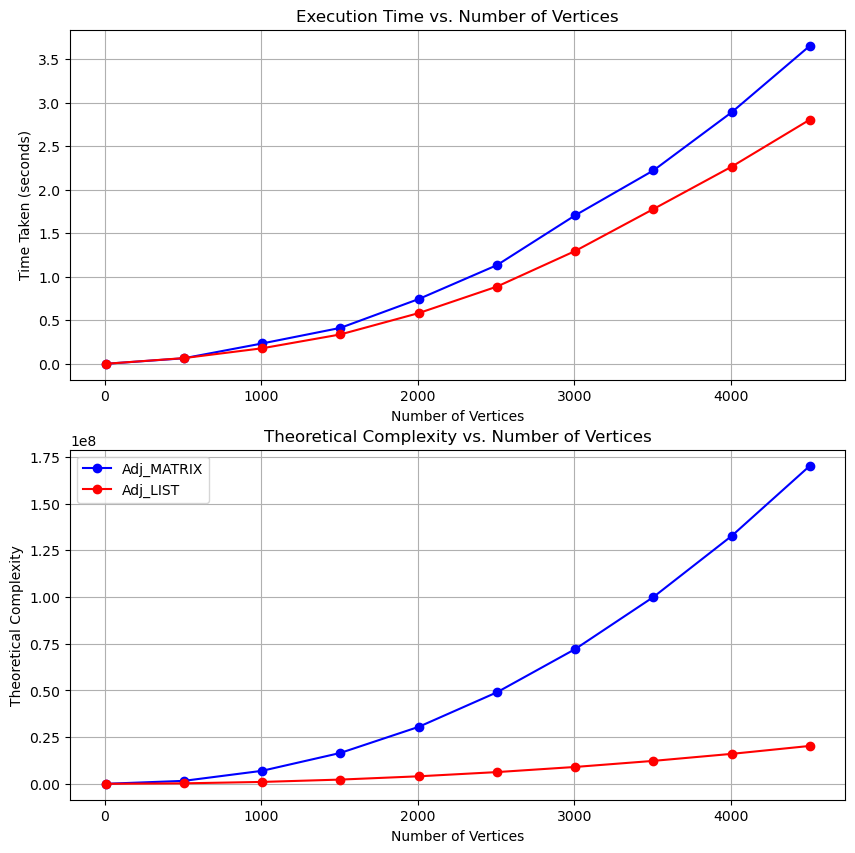

In [79]:

import matplotlib.pyplot as pltt
fig,ax = pltt.subplots(2,figsize=(10,10))
ax[0].plot(vertexarray, timematrix, marker='o', linestyle='-',color='b',label='Adj_MATRIX')
ax[0].plot(vertexarray, timell, marker='o', linestyle='-',color='r',label='Adj_LIST')
ax[0].set_xlabel('Number of Vertices')
ax[0].set_ylabel('Time Taken (seconds)')
ax[0].set_title('Execution Time vs. Number of Vertices')
ax[0].grid(True)



ax[1].plot(vertexarray, theoretical_complexity_list, marker='o', linestyle='-',color='b', label='Adj_MATRIX')
ax[1].plot(vertexarray, theoretical_complexity_matrix, marker='o', linestyle='-',color='r', label='Adj_LIST')
ax[1].set_xlabel('Number of Vertices')
ax[1].set_ylabel('Theoretical Complexity')
ax[1].set_title('Theoretical Complexity vs. Number of Vertices')
ax[1].grid(True)
ax[1].legend()

fig.show()


In [85]:
largest=500
array=[]
timematrix=[]
timell=[]
vertexarray=[]
counting=[]

theoretical_complexity_matrix=[]
theoretical_complexity_list=[]
verarray=[]
V=500
start=5
steps=50

iteration=10


for count in range(start,V,steps):
    print(count)
    edges=0
    weighted_graph_matrix = Weighted_Graph_matrix(V)
    startinit=time.time()
    for i in range(V):
#         print(i)
        array=generate_connected(count,V-1,largest,i)
        for y in range(len(array)):
            weight_random_gen=random.randint(1,largest)
            weighted_graph_matrix.add_edge_matrix(i, array[y], weight_random_gen)
            edges=edges+1
       
#     weighted_graph_matrix.print_graph()
#     weighted_graph_ll.print_weighted_graph()
        
    endinit=time.time()
    startmat=time.time()
#     print("start")
    
    for i in range(iteration):
#         start=time.time()
        weighted_graph_matrix.dijkstra_matrix(random.randint(0,V-1))
#         end=time.time()
#         timetaken=end-start
#         timematrix.append(timetaken)
#         counting.append(count)
#         print(end-start)

#     print("end")
    endmat=time.time()
#     print(endmat-startmat)
#     timetaken=(endinit-startinit+((endmat-startmat)/10))
    timetaken=(endmat-startmat)/iteration
#     timetaken=(endinit-startinit+((endmat-startmat)/V))
    timematrix.append(timetaken)
    counting.append(count)
    
    
    theoretical_complexity_matrix.append(V**2)
    theoretical_complexity_list.append((edges+V)*math.log(V))

    
# counting=[]
for count in range(start,V,steps):
    print(count)
    weighted_graph_ll = WeightedGraph_ll(V)
    startinitll=time.time()
    for i in range(V):
#         print(i)
        array=generate_connected(count,V-1,largest,i)
        for y in range(len(array)):
            weight_random_gen=random.randint(1,largest)
            weighted_graph_ll.add_edge_ll(i, array[y], weight_random_gen)
#             edges=edges+1
                
#     weighted_graph_matrix.print_graph()
#     weighted_graph_ll.print_weighted_graph()
  
    endinitll=time.time()
    startll=time.time()
    for i in range(iteration):
#         start=time.time()
        weighted_graph_ll.dijkstra_ll(random.randint(0,V-1))
#         end=time.time()
#         timetaken=end-start
#         timell.append(timetaken)
#         counting.append(count)

    endll=time.time()
#     timetaken=(endinitll-startinitll+((endll-startll)/V))
#     timetaken=(endinitll-startinitll+((endll-startll)/10))
    timetaken=(endll-startll)/iteration
    timell.append(timetaken)


# plt.plot(counting, timematrix, marker='o', linestyle='-',color='b',label='Adj_MATRIX')
# plt.plot(counting, timell, marker='o', linestyle='-',color='r',label='Adj_LIST')
# plt.xlabel('Number of edges per node')
# plt.ylabel('Time Taken (seconds)')
# plt.title(f'Number of vertex: {V-1}')
# plt.legend()
# plt.grid(True)
# plt.show()

# # # Plotting the data
# # for n vertexs
# matrix_fit = np.polyfit(counting, timematrix, 1)
# list_fit = np.polyfit(counting, timell, 1)

# # Create the best-fit lines
# matrix_line = np.poly1d(matrix_fit)
# list_line = np.poly1d(list_fit)

# # Plot the data points
# plt.plot(counting, timematrix, marker='o', linestyle='-', color='b', label='Adj_MATRIX')
# plt.plot(counting, timell, marker='o', linestyle='-', color='r', label='Adj_LIST')

# # Plot the best-fit lines
# plt.plot(counting, matrix_line(counting), linestyle='--', color='b')
# # plt.plot(counting, list_line(counting), linestyle='--', color='r')

# plt.xlabel('Number of edges per node')
# plt.ylabel('Time Taken (seconds)')
# plt.title(f'Number of vertex: {V-1}')
# plt.legend()
# plt.grid(True)
# plt.show()




5
55
105
155
205
255
305
355
405
455
5
55
105
155
205
255
305
355
405
455


C:\Users\TdrDi\AppData\Local\Temp\ipykernel_18116\4013580436.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


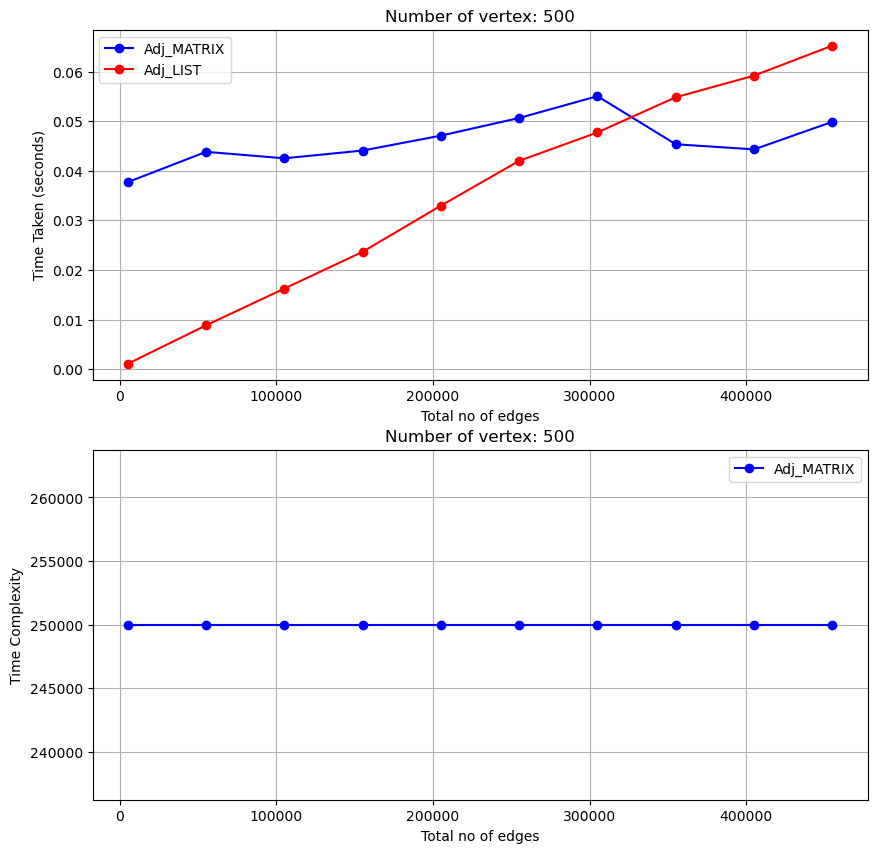

In [90]:
import matplotlib.pyplot as pltt
fig,axes = pltt.subplots(2,figsize=(10,10))
axes[0].plot(np.array(counting)*1000,timematrix , marker='o', linestyle='-',color='b',label='Adj_MATRIX')
axes[0].plot(np.array(counting)*1000, timell, marker='o', linestyle='-',color='r',label='Adj_LIST')
axes[0].set_xlabel('Total no of edges')
axes[0].set_ylabel('Time Taken (seconds)')
axes[0].set_title(f'Number of vertex: {V}')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(np.array(counting)*1000,np.array(theoretical_complexity_matrix), marker='o', linestyle='-',color='b', label='Adj_MATRIX')
#axes[1].plot(np.array(counting)*1000,theoretical_complexity_list, marker='o', linestyle='-',color='r', label='Adj_LIST')
axes[1].set_xlabel('Total no of edges')
axes[1].set_ylabel('Time Complexity')
axes[1].set_title(f'Number of vertex: {V}')
axes[1].legend()
axes[1].grid(True)

fig.show()

In [38]:
plt.plot(counting, theoretical_complexity_matrix, marker='o', linestyle='-',color='b', label='Adj_MATRIX')
plt.plot(counting, theoretical_complexity_list, marker='o', linestyle='-',color='r', label='Adj_LIST')
plt.xlabel('Number of edges per vertex')
plt.ylabel('Theoretical Complexity')
plt.title(f'Number of vertex: {V-1}')
plt.grid(True)
plt.legend()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

In [ ]:
print(edges)
print(theoretical_complexity_matrix)
